## Importing Libraries

In [772]:
import pandas as pd   
import matplotlib.pyplot as plt
import plotly.express as px
import time
import numpy as np
import warnings

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
#from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold, cross_val_score

from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# the permutation based importance
import seaborn as sns
from sklearn.inspection import permutation_importance

from numpy import mean
import warnings
warnings.filterwarnings("ignore") 

## Loading Dataset

In [773]:
# Importing Dataset using Pandas.
data = pd.read_csv("E:\Datasets\customer_churn.csv")
data.shape  

(10127, 21)

In [774]:
data.head()

,client_num,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## 2.1 Exploratory Data Analysis

Checking shape of the dataset.

In [775]:
# Checking Shape of the dataset.
print('Length of Dataset: ', data.shape[0])
print('Number of Attributes: ', data.shape[1])

Length of Dataset:  10127
Number of Attributes:  21


### 2.1.1 Computing Descriptive Statistics of data

Calculate descriptive statistics for all numeric features of the dataset.

In [776]:
data.describe()

,client_num,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


#### 2.1.2 Compare the descriptive statistics of arited and existing customers

Creating datasets for existing and attrited customers. so that we can compute the statistics of them separately.

In [777]:
existing_customer_data = data[data["attrition_flag"] == "Existing Customer"]
attrtited_customer_data = data[data["attrition_flag"] == "Attrited Customer"]

In [778]:
existing_customer_data.describe()

,client_num,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,8.500000e+03,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000
mean,7.399272e+08,46.262118,2.335412,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412
std,3.710723e+07,8.081157,1.303229,8.021810,1.528949,1.016741,1.081436,9084.969807,757.745354,9087.671862,0.217783,3512.772635,22.919011,0.228054,0.272568
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,15.000000,0.256000,816.000000,11.000000,0.028000,0.000000
25%,7.132197e+08,41.000000,1.000000,31.000000,3.000000,1.000000,2.000000,2602.000000,800.000000,1184.500000,0.643000,2384.750000,54.000000,0.617000,0.055000
50%,7.181643e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4643.500000,1364.000000,3469.500000,0.743000,4100.000000,71.000000,0.721000,0.211000
75%,7.783415e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11252.750000,1807.000000,9978.250000,0.860000,4781.250000,82.000000,0.833000,0.529250
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,5.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.994000


Count of existing customers are 8500 as the cunt of attrited customers are 1627.

Mean Age of both existing and attrited customers are sameas 46. Max age of the attrited customer is 68 and max age of existing customer is 72 whereas min age of both are same as 26.

In [779]:
attrtited_customer_data.describe()

,client_num,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,1.627000e+03,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000
mean,7.352614e+08,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475
std,3.557725e+07,7.665652,1.275010,7.796548,1.577782,0.899623,1.090537,9095.334105,921.385582,9109.208129,0.214924,2308.227629,14.568429,0.226854,0.264458
min,7.080833e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.123713e+08,41.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2114.000000,0.000000,1587.000000,0.544500,1903.500000,37.000000,0.400000,0.000000
50%,7.165644e+08,47.000000,2.000000,36.000000,3.000000,3.000000,3.000000,4178.000000,0.000000,3488.000000,0.701000,2329.000000,43.000000,0.531000,0.000000
75%,7.683737e+08,52.000000,3.000000,40.000000,5.000000,3.000000,4.000000,9933.500000,1303.500000,9257.500000,0.856000,2772.000000,51.000000,0.692000,0.231000
max,8.282949e+08,68.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,1.492000,10583.000000,94.000000,2.500000,0.999000


#### 2.1.3 Computing Distribution of Categorical Columns

Calculating the distribution of our target variable "Attrittion Flag"

In [780]:
# Counting Number of Target.
dictribution = data["attrition_flag"].value_counts()
dictribution

Existing Customer    8500
Attrited Customer    1627
Name: attrition_flag, dtype: int64

We can see that our data is imbalanced as the existing customer count is more as compare to the attrited customer count. So its a imbalanced class problem.

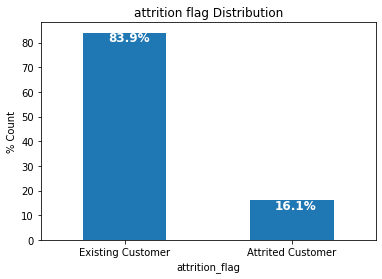

In [781]:
ax = (data['attrition_flag'].value_counts()*100.0 /len(data)).plot(kind='bar', stacked = True,rot = 0)
ax.set_ylabel('% Count')
ax.set_xlabel('attrition_flag')
ax.set_ylabel('% Count')
ax.set_title('attrition flag Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')
    

We can observe from the bar chart above that Existing Customer are 84% in the dataset and Attrited customers are 16%. Below we are plotting the Pie Plot of our target variable.

Existing Customer    8500
Attrited Customer    1627
Name: attrition_flag, dtype: int64


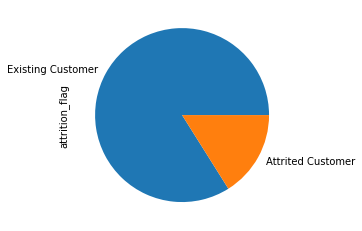

In [782]:
# Let's calculate the percentage of Business category.
data['attrition_flag'].value_counts()
func_dict = data["attrition_flag"].value_counts()
print(func_dict)

#plot the bar graph of percentage categories
data['attrition_flag'].value_counts().plot.pie()
plt.show()

Now we are plotting the Bar plot of distribution of gender in the dataset. we can observe that number of females are slighly higher than the number of males.

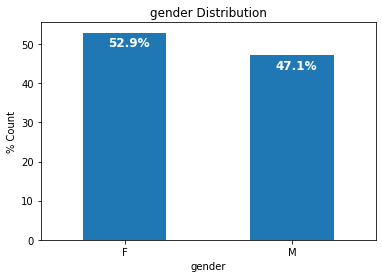

In [783]:
ax = (data['gender'].value_counts()*100.0 /len(data)).plot(kind='bar', stacked = True,rot = 0)
ax.set_ylabel('% Count')
ax.set_xlabel('gender')
ax.set_ylabel('% Count')
ax.set_title('gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')
    

Below is the bar chart of distribution of education level among the dataset. we can see that most of the people are graduates and high school grads, while very few are doctorate as well.

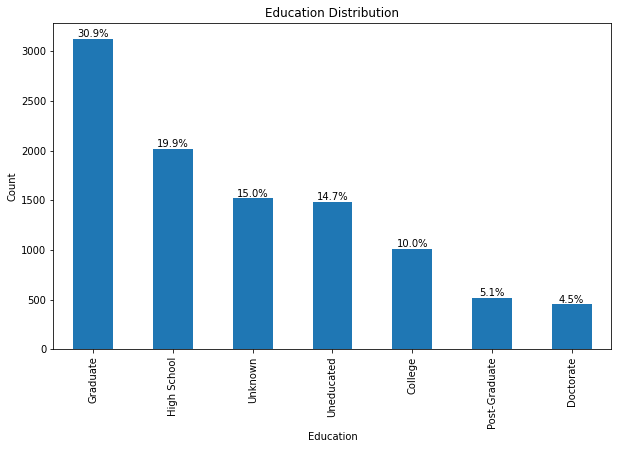

In [784]:
class_counts = data['education_level'].value_counts()
total = class_counts.sum()

plt.figure(figsize=(10, 6))  

ax = class_counts.plot(kind='bar')

plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')


# Add percentages on top of the bars
for i, count in enumerate(class_counts):
    percentage = count / total * 100
    ax.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()


Most of the people in the dataset are married followed by singles, which can be seen in the bar chart below. very few are divorced as well.

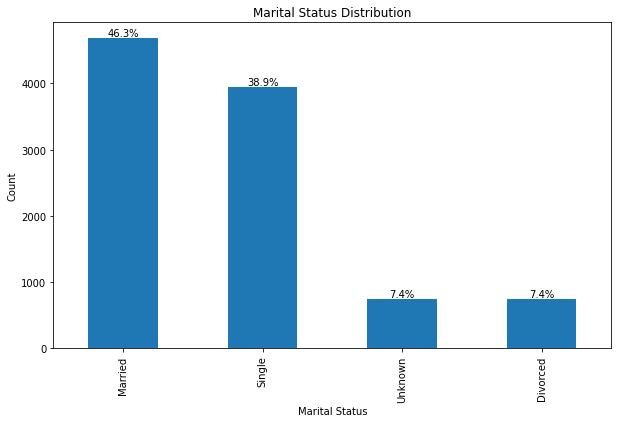

In [785]:
class_counts = data['marital_status'].value_counts()
total = class_counts.sum()

plt.figure(figsize=(10, 6))  # Adjust the width and height as desired

ax = class_counts.plot(kind='bar')

plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')


# Add percentages on top of the bars
for i, count in enumerate(class_counts):
    percentage = count / total * 100
    ax.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()


About 90% of people are using blue category card, and rest 10% are using other categories card.

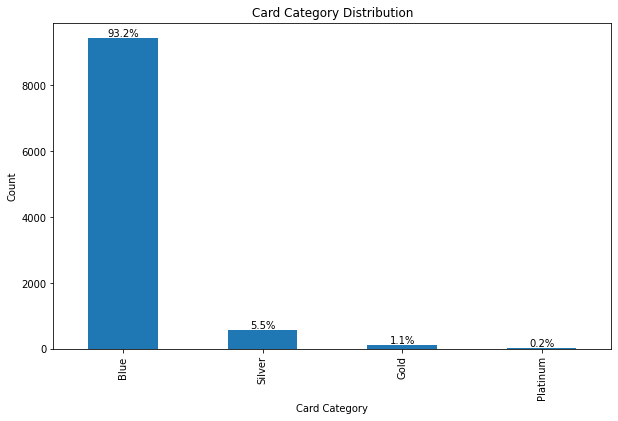

In [786]:
class_counts = data['card_category'].value_counts()
total = class_counts.sum()

plt.figure(figsize=(10, 6))  # Adjust the width and height as desired

ax = class_counts.plot(kind='bar')

plt.title('Card Category Distribution')
plt.xlabel('Card Category')
plt.ylabel('Count')


# Add percentages on top of the bars
for i, count in enumerate(class_counts):
    percentage = count / total * 100
    ax.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()


Most of the people are having income less than 40K, Whereas some of them are having income income aroung &60K TO 80k.

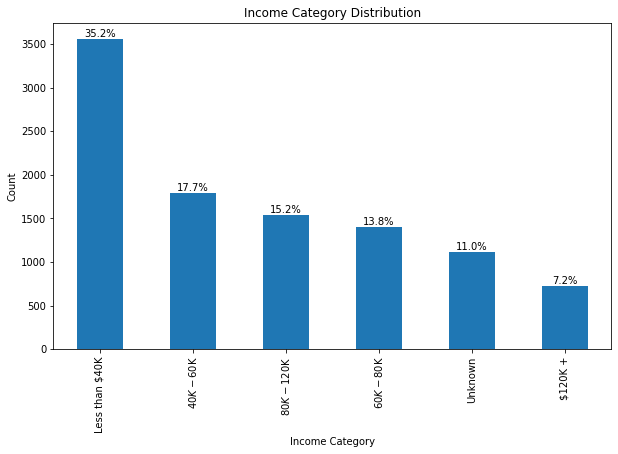

In [787]:
class_counts = data['income_category'].value_counts()
total = class_counts.sum()

plt.figure(figsize=(10, 6))  # Adjust the width and height as desired

ax = class_counts.plot(kind='bar')

plt.title('Income Category Distribution')
plt.xlabel('Income Category')
plt.ylabel('Count')


# Add percentages on top of the bars
for i, count in enumerate(class_counts):
    percentage = count / total * 100
    ax.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()


#### 2.1.4 Relation Ship Between Features

Most of the people are using Blue category card so the rate of attrition is also high in this category.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Blue'),
  Text(1, 0, 'Gold'),
  Text(2, 0, 'Platinum'),
  Text(3, 0, 'Silver')])

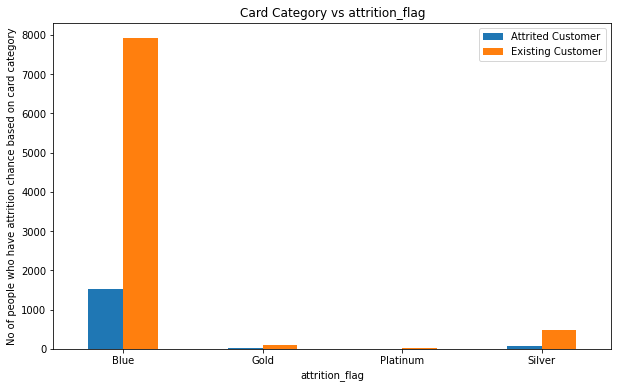

In [788]:
# Count of People left wrt Card.
pd.crosstab(data['card_category'],data['attrition_flag']).plot(kind="bar",figsize=(10,6))
plt.title("Card Category vs attrition_flag")
plt.xlabel("attrition_flag")
plt.ylabel("No of people who have attrition chance based on card category")
plt.legend(["Attrited Customer","Existing Customer"])
plt.xticks(rotation=0)

Females are having slighly more attrition rate as compares to males.

(array([0, 1]), [Text(0, 0, 'F'), Text(1, 0, 'M')])

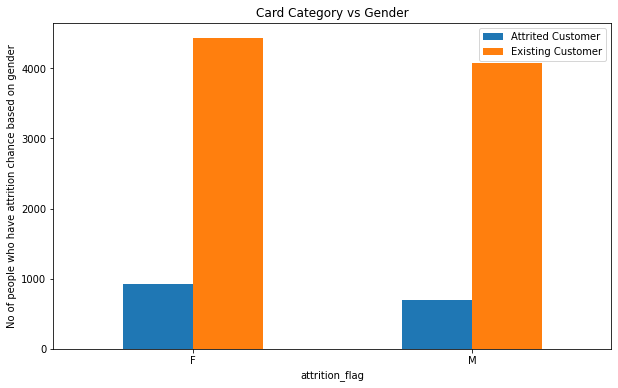

In [789]:
# Count of People left wrt Gender.
pd.crosstab(data['gender'],data['attrition_flag']).plot(kind="bar",figsize=(10,6))
plt.title("Card Category vs Gender")
plt.xlabel("attrition_flag")
plt.ylabel("No of people who have attrition chance based on gender")
plt.legend(["Attrited Customer","Existing Customer"])
plt.xticks(rotation=0)

Below is the bivariate plot of the attrition with respect to education level. we can see that rate of attrition is almost same in each category.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'College'),
  Text(1, 0, 'Doctorate'),
  Text(2, 0, 'Graduate'),
  Text(3, 0, 'High School'),
  Text(4, 0, 'Post-Graduate'),
  Text(5, 0, 'Uneducated'),
  Text(6, 0, 'Unknown')])

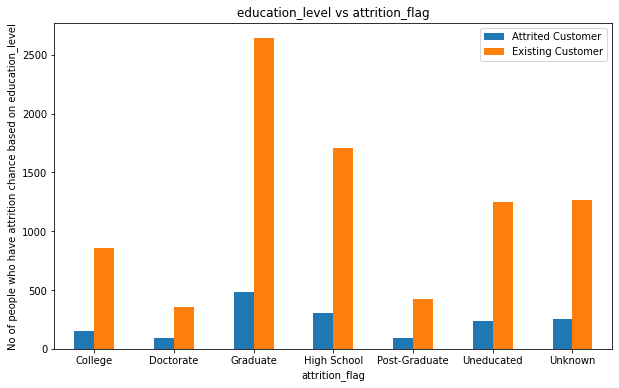

In [790]:
# Count of People left wrt education.
pd.crosstab(data['education_level'],data['attrition_flag']).plot(kind="bar",figsize=(10,6))
plt.title("education_level vs attrition_flag")
plt.xlabel("attrition_flag")
plt.ylabel("No of people who have attrition chance based on education_level")
plt.legend(["Attrited Customer","Existing Customer"])
plt.xticks(rotation=0)

Below is the age dstribution plot in which we can observe that most of the people in our dataset are having age between 40 to 50. whereas minimum age in 25 and max age is 70.

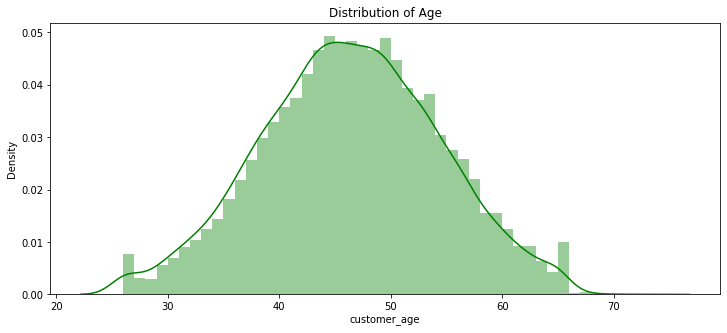

In [791]:
# Age Distribution
plt.figure(figsize=(12,5))
plt.title("Distribution of Age")
ax = sns.distplot(data["customer_age"], color = 'g')

Amost 6000 customer are having 3 0r 2 dependents.

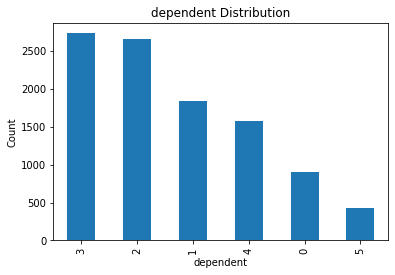

In [792]:
class_counts = data['dependent_count'].value_counts()
class_counts.plot(kind='bar')

plt.title('dependent Distribution')
plt.xlabel('dependent')
plt.ylabel('Count')

plt.show()

## 2.2 Data Pre Processing

Before using the data in the machine learning algorithms, preparing the data is a crucial step. Data 
preprocessing is a data mining technique used to turn the raw data into a format that is both 
practical and effective.
For our dataset, we also must perform some data pre-processing

#### 2.2.1 Checking Duplicated and Null Values

In [793]:
# Checking Null values in all features.
data.duplicated().sum()

0

We can see that our data dont have any duplicates.

In [794]:
# Checking Null values in all features.
data.isnull().sum()

client_num                  0
attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64

We can see that we dont have any Null 

Checking datatypes of the columns, we can see that we have both continious features and categorical features. so before applying machine learning we have to convert all the categorical features into numeircal form.

#### 2.2.3 Encode the categorical values

In [795]:
# Checking Data Types of every column.
data.dtypes

client_num                    int64
attrition_flag               object
customer_age                  int64
gender                       object
dependent_count               int64
education_level              object
marital_status               object
income_category              object
card_category                object
months_on_book                int64
total_relationship_count      int64
months_inactive_12_mon        int64
contacts_count_12_mon         int64
credit_limit                float64
total_revolving_bal           int64
avg_open_to_buy             float64
total_amt_chng_q4_q1        float64
total_trans_amt               int64
total_trans_ct                int64
total_ct_chng_q4_q1         float64
avg_utilization_ratio       float64
dtype: object

In [796]:
cols = data.columns  # Listing all column names.
print(cols)

Index(['client_num', 'attrition_flag', 'customer_age', 'gender',
       'dependent_count', 'education_level', 'marital_status',
       'income_category', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'],
      dtype='object')


In [797]:
num_cols = data._get_numeric_data().columns       # Listing all numerical columns.
print(num_cols)

Index(['client_num', 'customer_age', 'dependent_count', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'],
      dtype='object')


In [798]:
# Listing categorical Column
categorical_colums = list(set(cols) - set(num_cols))
categorical_colums

['education_level',
 'income_category',
 'attrition_flag',
 'card_category',
 'gender',
 'marital_status']

### Label Encoding

Most of the columns in our dataset are in integer format, but some features are in categorical object format. To apply machine learning models on the data 
we first need to convert these features into the numerical format. For that we will 
perform label encoding on the data.

Converting Categorical variable into numeircal format.

In [799]:
data['education_level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [800]:
data['education_level'] = data['education_level'].map({'High School': 0, 'Graduate': 1, 'Uneducated' :2, 'Unknown':3, 'College':4, 'Post-Graduate':5, 'Doctorate':6})
data['education_level'] = pd.to_numeric(data['education_level'])

In [801]:
data['education_level'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [802]:
data['attrition_flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [803]:
data['attrition_flag'] = data['attrition_flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
data['attrition_flag'] = pd.to_numeric(data['attrition_flag'])

In [804]:
data['card_category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [805]:
data['card_category'] = data['card_category'].map({'Blue': 0, 'Gold': 1, 'Silver' :2, 'Platinum':3})
data['card_category'] = pd.to_numeric(data['card_category'])

In [806]:
data['gender'].unique()

array(['M', 'F'], dtype=object)

In [807]:
data['gender'] = data['gender'].map({'M': 0, 'F': 1})
data['gender'] = pd.to_numeric(data['gender'])

In [808]:
data['marital_status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [809]:
data['marital_status'] = data['marital_status'].map({'Married': 0, 'Single': 1, 'Unknown' :2, 'Divorced':3})
data['marital_status'] = pd.to_numeric(data['marital_status'])

In [810]:
data['income_category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [811]:
data['income_category'] = data['income_category'].map({'$60K - $80K': 3, 'Less than $40K': 1, '$80K - $120K' :4, 'Unknown':0, '$40K - $60K':2, '$120K +':5})
data['income_category'] = pd.to_numeric(data['income_category'])

Now we can see that all the features are in numerical format.

In [812]:
# Checking Data Types of every column.
data.dtypes

client_num                    int64
attrition_flag                int64
customer_age                  int64
gender                        int64
dependent_count               int64
education_level               int64
marital_status                int64
income_category               int64
card_category                 int64
months_on_book                int64
total_relationship_count      int64
months_inactive_12_mon        int64
contacts_count_12_mon         int64
credit_limit                float64
total_revolving_bal           int64
avg_open_to_buy             float64
total_amt_chng_q4_q1        float64
total_trans_amt               int64
total_trans_ct                int64
total_ct_chng_q4_q1         float64
avg_utilization_ratio       float64
dtype: object

In [813]:
data.head()

,client_num,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,0,45,0,3,0,0,3,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,1,5,1,1,1,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,0,3,1,0,4,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,1,4,0,2,1,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,0,3,2,0,3,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


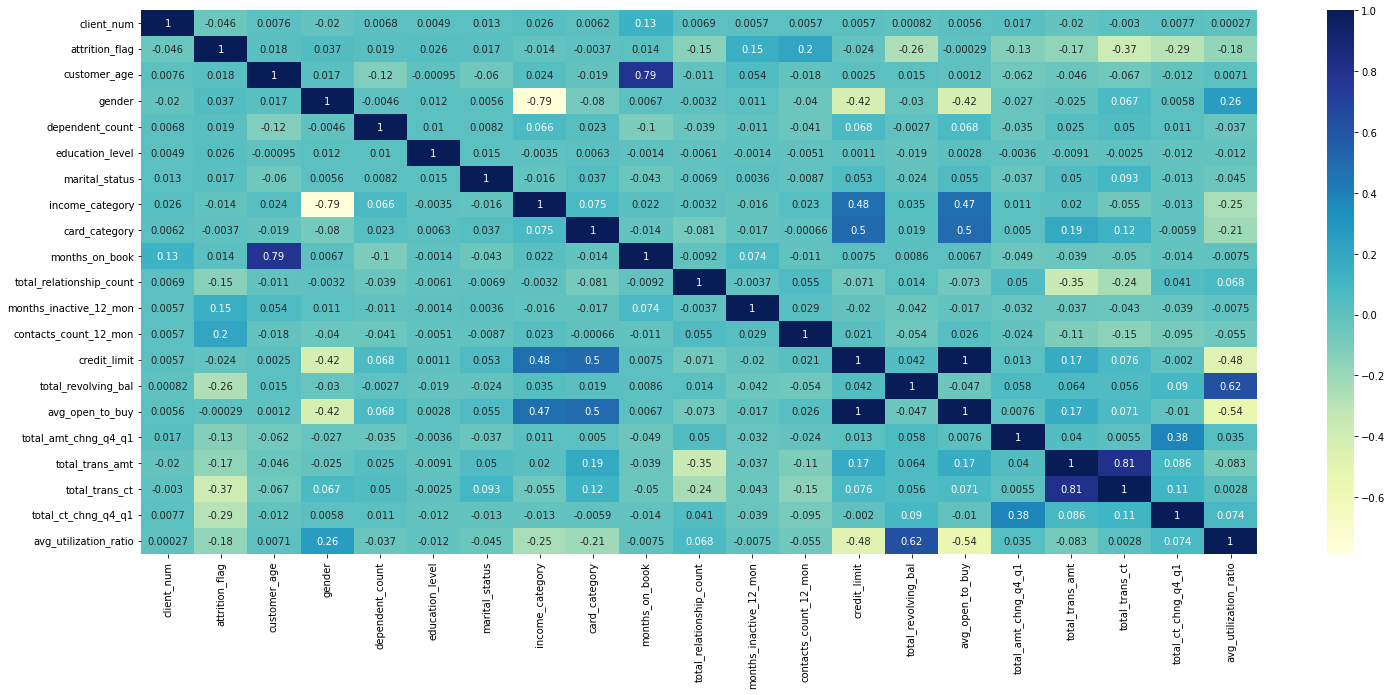

In [814]:
#Now lets try plotting the correlation heatmap

plt.figure(figsize = (25,10))
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

plt.show()

In [815]:
# Dropping Unnecessary Column.
data.drop('client_num',axis=1,inplace=True)

Dropping Client number column because it is not relevant with our target prediction and will cause overfitting in models.

## 2.3.1 Train - Test Split

In [816]:
X = data.loc[:, data.columns != 'attrition_flag']     # All columns except target variable.
y = data[['attrition_flag']]                          # Target Variable.

The train-test split procedure is used to estimate the performance of machine learning algorithms when 
they are used to make predictions on data not used to train the model. Here we are splitting our dataset 
into train dataset and test dataset with the ratio of 70-30% where 70% is our train dataset and 30 is our 
test dataset

In [817]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(7088, 19)
(7088, 1)
(3039, 19)
(3039, 1)


In [818]:
features = trainX.columns
print(features)

Index(['customer_age', 'gender', 'dependent_count', 'education_level',
       'marital_status', 'income_category', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'],
      dtype='object')


## 2.3.2 Applying Machine Learning Models

### Random Forest Classifier

In [819]:
rf = RandomForestClassifier(max_depth=50,n_estimators = 150)
rf.fit(trainX,trainy.values.ravel())
y_pred = rf.predict(testX)

In [820]:
print(classification_report(testy,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2556
           1       0.94      0.81      0.87       483

    accuracy                           0.96      3039
   macro avg       0.95      0.90      0.92      3039
weighted avg       0.96      0.96      0.96      3039



With Random forest we are getting the accuracy of 96% which is a quite good accuracy.

#### 2.4.1 Confusion Metrics

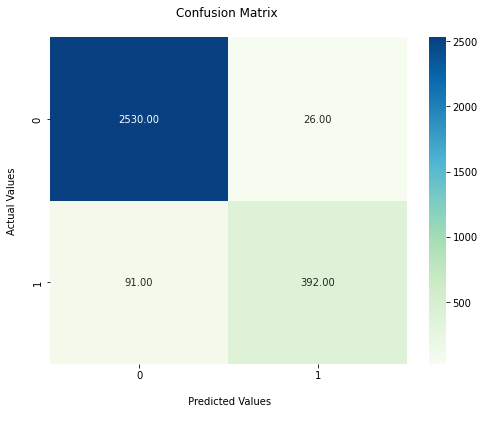

In [821]:
plt.figure(figsize=(8,6))
fx=sns.heatmap(confusion_matrix(testy,y_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n')
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n')
plt.show()

We can see from the confusion matrix that True positives values are 2525. which means this much time class is positive and predicted as positive where as true negative value is 391 which means this much class was negative and predicted as negative. False positive is 31 which means this much class was negative but preidted as positive. and False Negative is 92 which means this much time class was positive but predicted as Negative.

#### 2.4.2 Precision and Recall

In [822]:
accuracy = rf.score(testX, testy)
print("Accuracy of Random Forest:",accuracy*100,"%")
print('------------------------------------')

from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

Accuracy of Random Forest: 96.15004935834156 %
------------------------------------
Recall: 0.8115942028985508
------------------------------------
Precision: 0.937799043062201
------------------------------------


Recall is 0.80 which means our model is correctly identifying True positives.

Precision is the ratio between the True Positives and all the Positives. For our problem statement, that would be the measure of cases that we correctly identify having a churn customer out of all the cases having it

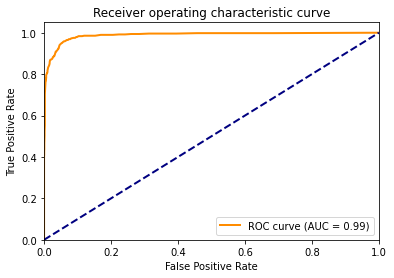

In [823]:
from sklearn.metrics import roc_curve, auc

# Compute the predicted probabilities for each class
y_pred_prob = rf.predict_proba(testX)
# Compute the micro-average ROC curve and AUC score
fpr, tpr, _ = roc_curve(testy, y_pred_prob[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

ROC curve is quite good for this model as we can see that the line cuve is near the value 1.

### 2.3.4 Hyper Parameter Tuning of Random Forest Using Grid Search Optimizer.

In [824]:
rf_cv = RandomForestClassifier()
param_grid = {
    'max_depth': [2, 5, 10, 20, 30, 40, 50],
    'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600] 
}
grid_search = GridSearchCV(estimator = rf_cv, param_grid=param_grid, cv = 3, verbose = 2)
grid_search.fit(trainX, trainy.values.ravel())
best_grid = grid_search.best_estimator_
print(best_grid)

In [825]:
rf = RandomForestClassifier(max_depth=20,n_estimators = 500)
rf.fit(trainX,trainy.values.ravel())
y_pred = rf.predict(testX)

accuracy = rf.score(testX, testy)
print("Accuracy of Random Forest:",accuracy*100,"%")
print('------------------------------------')

Accuracy of Random Forest: 96.31457716354063 %
------------------------------------


After Hyperparameter tuning, we optimized 2 parameters and the accuracy of random forest model increase from 95% to 96.

### Gradient Boosting Classifier

In [826]:
gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=400)
gb.fit(trainX,trainy.values.ravel())
y_pred = gb.predict(testX)

In [827]:
print(classification_report(testy,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2556
           1       0.93      0.83      0.88       483

    accuracy                           0.96      3039
   macro avg       0.95      0.91      0.93      3039
weighted avg       0.96      0.96      0.96      3039



with Gradient boosting we are getting accuracy of 96.3% which is better than random forest model.

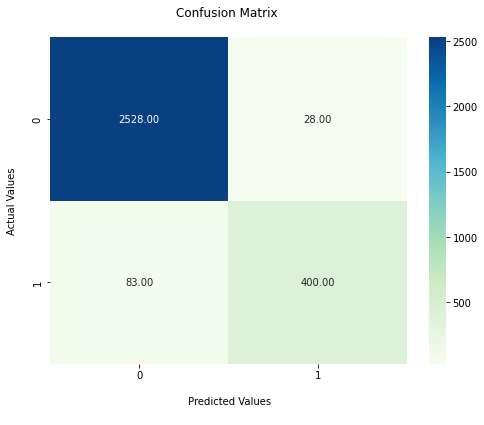

In [828]:
plt.figure(figsize=(8,6))
fx=sns.heatmap(confusion_matrix(testy,y_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n')
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n')
plt.show()

We can see from the confusion matrix that True positives values are 2527. which means this much time class is positive and predicted as positive where as true negative value is 402 which means this much class was negative and predicted as negative. False positive is 29 which means this much class was negative but preidted as positive. and False Negative is 81 which means this much time class was positive but predicted as Negative.

In [829]:
accuracy = gb.score(testX, testy)
print("Accuracy of Gradient Boosting:",accuracy*100,"%")
print('------------------------------------')

from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

Accuracy of Gradient Boosting: 96.34748272458046 %
------------------------------------
Recall: 0.8281573498964804
------------------------------------
Precision: 0.9345794392523364
------------------------------------


Recall and Precision of Gradient Boosting model is also better than random forest.

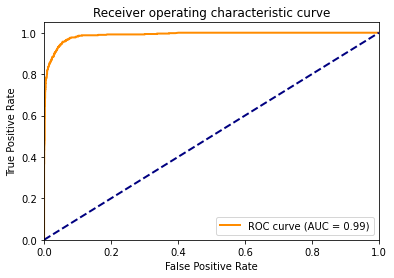

In [830]:
from sklearn.metrics import roc_curve, auc

# Compute the predicted probabilities for each class
y_pred_prob = rf.predict_proba(testX)
# Compute the micro-average ROC curve and AUC score
fpr, tpr, _ = roc_curve(testy, y_pred_prob[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

### 2.3.4 Hyper Parameter Tuning of Gradient Boosting Using Grid Search Optimizer.

In [831]:
gb_cv = GradientBoostingClassifier()
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 150, 200, 250, 300,400,500] 
}
grid_search = GridSearchCV(estimator = gb_cv, param_grid=param_grid, cv = 3, verbose = 2)
grid_search.fit(trainX, trainy.values.ravel())
best_grid = grid_search.best_estimator_
print(best_grid)

In [832]:
gb = GradientBoostingClassifier(learning_rate=0.05, n_estimators=500)
gb.fit(trainX,trainy.values.ravel())
y_pred = gb.predict(testX)

In [833]:
accuracy = gb.score(testX, testy)
print("Accuracy of Gradient Boosting:",accuracy*100,"%")
print('------------------------------------')

Accuracy of Gradient Boosting: 97.20302731161567 %
------------------------------------


After Hyperparameter Tuning, the accuracy of the model increases from 96% to 97%.

## 2.4.3 Grouping Subset As per Income Categories

we are taking 4 categories. Records with "unknown" income category are in "unknown_income_set", records with low income like less tha $40k are in "low income set", records with mediam income like in range $40K - $80K are in "mediam income set". Similarly, in the last set we have "High Income set" which has income greater than $80K records.

In [834]:
test = testX

In [835]:
test['attrition_flag'] = testy

In [836]:
test.shape

(3039, 20)

Creating 4 different datasets on basis of income category.

In [837]:
# Create a list of income categories for each subset
subset_categories = [[0], [1], [2, 3], [4, 5]]

# Initialize an empty dictionary to store the subsets
dataframes_by_subset = {}

# Iterate over the subset categories and filter the dataframe
for i, categories in enumerate(subset_categories):
    subset_df = test[test['income_category'].isin(categories)]
    dataframes_by_subset[i+1] = subset_df

# Access the subsets using keys 1, 2, 3, and 4
unknown_income_set = dataframes_by_subset[1]
low_income_set = dataframes_by_subset[2]
mediam_income_set = dataframes_by_subset[3]
high_income_set = dataframes_by_subset[4]


## Evaluating Models on Each Group

### For Unknown Income:

In [838]:
X = unknown_income_set[['customer_age', 'gender', 'dependent_count',
       'education_level', 'marital_status', 'income_category', 'card_category',
       'months_on_book', 'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'] ]    # All columns except target variable.
y = unknown_income_set[['attrition_flag']]                          # Target Variable.

In [839]:
y_pred = rf.predict(X)

accuracy = rf.score(X, y)
print("Accuracy of Random Forest on Unknown Income Group:",accuracy*100,"%")
print('------------------------------------')

from sklearn.metrics import recall_score
recall = recall_score(y,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(y,y_pred)
print("Precision:",precision)
print('------------------------------------')


y_pred = gb.predict(X)

accuracy = gb.score(X, y)
print("Accuracy of Gradient Boosting on Unknown Income Group:",accuracy*100,"%")
print('------------------------------------')

from sklearn.metrics import recall_score
recall = recall_score(y,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(y,y_pred)
print("Precision:",precision)
print('------------------------------------')

Accuracy of Random Forest on Unknown Income Group: 96.18768328445748 %
------------------------------------
Recall: 0.873015873015873
------------------------------------
Precision: 0.9166666666666666
------------------------------------
Accuracy of Gradient Boosting on Unknown Income Group: 97.65395894428153 %
------------------------------------
Recall: 0.9206349206349206
------------------------------------
Precision: 0.9508196721311475
------------------------------------


We can see from the results that here gradient boosting is performing well as compare to the random forest just like on full data in term of all recall, precision and accuracy metrics. Accuracy of gradient booting increase on this category records.

### For Mediam Income Group

In [840]:
X = mediam_income_set[['customer_age', 'gender', 'dependent_count',
       'education_level', 'marital_status', 'income_category', 'card_category',
       'months_on_book', 'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'] ]    # All columns except target variable.
y = mediam_income_set[['attrition_flag']]                          # Target Variable.

In [841]:
y_pred = rf.predict(X)

accuracy = rf.score(X, y)
print("Accuracy of Random Forest on Mediam Income Group:",accuracy*100,"%")
print('------------------------------------')

from sklearn.metrics import recall_score
recall = recall_score(y,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(y,y_pred)
print("Precision:",precision)
print('------------------------------------')

y_pred = gb.predict(X)

accuracy = gb.score(X, y)
print("Accuracy of Gradient Boosting on Mediam Income Group:",accuracy*100,"%")
print('------------------------------------')

from sklearn.metrics import recall_score
recall = recall_score(y,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(y,y_pred)
print("Precision:",precision)
print('------------------------------------')

Accuracy of Random Forest on Mediam Income Group: 95.6149732620321 %
------------------------------------
Recall: 0.7426470588235294
------------------------------------
Precision: 0.9439252336448598
------------------------------------
Accuracy of Gradient Boosting on Mediam Income Group: 96.47058823529412 %
------------------------------------
Recall: 0.8308823529411765
------------------------------------
Precision: 0.9186991869918699
------------------------------------


Here as well on the Low level income records, We can see that here gradient boosting is performing well as compare to the random forest just like on full data in term of all recall, precision and accuracy metrics. 

### For Low Income Group

In [842]:
X = low_income_set[['customer_age', 'gender', 'dependent_count',
       'education_level', 'marital_status', 'income_category', 'card_category',
       'months_on_book', 'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'] ]    # All columns except target variable.
y = low_income_set[['attrition_flag']]                          # Target Variable.

In [843]:
y_pred = rf.predict(X)

accuracy = rf.score(X, y)
print("Accuracy of Random Forest on Low Income Group:",accuracy*100,"%")
print('------------------------------------')

from sklearn.metrics import recall_score
recall = recall_score(y,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(y,y_pred)
print("Precision:",precision)
print('------------------------------------')

y_pred = gb.predict(X)

accuracy = gb.score(X, y)
print("Accuracy of Gradient Boosting on Low Income Group:",accuracy*100,"%")
print('------------------------------------')

from sklearn.metrics import recall_score
recall = recall_score(y,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(y,y_pred)
print("Precision:",precision)
print('------------------------------------')

Accuracy of Random Forest on Low Income Group: 97.54948162111215 %
------------------------------------
Recall: 0.8922155688622755
------------------------------------
Precision: 0.9490445859872612
------------------------------------
Accuracy of Gradient Boosting on Low Income Group: 97.83223374175306 %
------------------------------------
Recall: 0.9221556886227545
------------------------------------
Precision: 0.9390243902439024
------------------------------------


Here on Mediam level income category, both model are performing very well with 97% accuracy but Graient boosting is slighly better than the random forest.

### High Income Group

In [844]:
X = high_income_set[['customer_age', 'gender', 'dependent_count',
       'education_level', 'marital_status', 'income_category', 'card_category',
       'months_on_book', 'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'] ]    # All columns except target variable.
y = high_income_set[['attrition_flag']]                          # Target Variable.

In [845]:
y_pred = rf.predict(X)

accuracy = rf.score(X, y)
print("Accuracy of Random Forest on High Income Group:",accuracy*100,"%")
print('------------------------------------')

from sklearn.metrics import recall_score
recall = recall_score(y,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(y,y_pred)
print("Precision:",precision)
print('------------------------------------')

y_pred = gb.predict(X)

accuracy = gb.score(X, y)
print("Accuracy of Gradient Boosting on High Income Group:",accuracy*100,"%")
print('------------------------------------')

from sklearn.metrics import recall_score
recall = recall_score(y,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(y,y_pred)
print("Precision:",precision)
print('------------------------------------')

Accuracy of Random Forest on High Income Group: 95.44159544159544 %
------------------------------------
Recall: 0.7692307692307693
------------------------------------
Precision: 0.9473684210526315
------------------------------------
Accuracy of Gradient Boosting on High Income Group: 97.00854700854701 %
------------------------------------
Recall: 0.8632478632478633
------------------------------------
Precision: 0.9528301886792453
------------------------------------


Here as well on the High level income records, We can see that here gradient boosting is performing well as compare to the random forest just like on full data in term of all recall, precision and accuracy metrics. 